# Практическая работа №3 по Большим данным

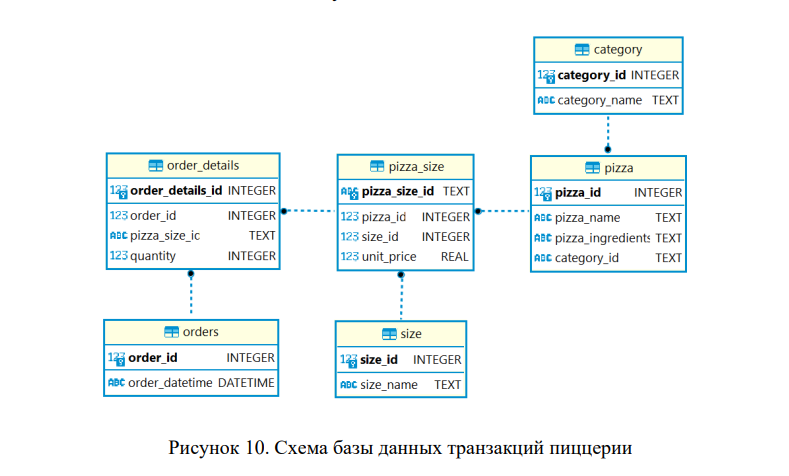

In [2]:
%load_ext sql
%sql sqlite:///pizza_orders.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Задание 1. Найдите информацию по поводу ключевого слова HAVING запроса SELECT. Объясните, для чего оно нужно, приведите пример запроса с HAVING. (1 балл).**

Ключевое слово HAVING используется в SQL запросах после оператора GROUP BY для фильтрации групп, которые создаются операцией группировки. Это позволяет применять условия к результатам агрегатных функций, таких как SUM, AVG, COUNT, и т.д., после того, как данные были сгруппированы.

In [12]:
%%sql

SELECT pizza_id, unit_price, (unit_price * 9 / 10) AS salary_unit_price
FROM pizza_size
GROUP BY pizza_id
HAVING salary_unit_price < 12;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


pizza_id,unit_price,salary_unit_price
1,13.25,11.925
8,12.75,11.475
9,12.0,10.8
10,12.5,11.25
11,12.0,10.8
15,12.0,10.8
20,12.0,10.8
23,12.0,10.8
25,12.75,11.475
27,12.5,11.25


**Задание 2. Получите список всех имен таблиц и их запросов из таблицы sqlite_schema. (1 балл)**

In [14]:
%%sql

SELECT name, sql
FROM sqlite_schema
WHERE type = 'table';

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


name,sql
size,"CREATE TABLE size ( size_id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, size_name TEXT NOT NULL )"
sqlite_sequence,"CREATE TABLE sqlite_sequence(name,seq)"
category,"CREATE TABLE category ( category_id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, category_name TEXT NOT NULL )"
pizza,"CREATE TABLE pizza ( pizza_id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, pizza_name TEXT NOT NULL, pizza_ingredients TEXT NOT NULL, category_id TEXT NOT NULL, FOREIGN KEY(category_id) REFERENCES category(category_id) )"
pizza_size,"CREATE TABLE pizza_size ( pizza_size_id TEXT NOT NULL PRIMARY KEY, pizza_id INTEGER NOT NULL, size_id INTEGER NOT NULL, unit_price REAL NOT NULL, FOREIGN KEY(pizza_id) REFERENCES pizza(pizza_id), FOREIGN KEY(size_id) REFERENCES size(size_id) )"
orders,"CREATE TABLE orders ( order_id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, order_datetime DATETIME NOT NULL )"
order_details,"CREATE TABLE order_details ( order_details_id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, order_id INTEGER NOT NULL, pizza_size_id TEXT NOT NULL, quantity INTEGER NOT NULL, FOREIGN KEY(order_id) REFERENCES orders(order_id), FOREIGN KEY(pizza_size_id) REFERENCES pizza_size(pizza_size_id) )"


**Задание 3. Получите перечень названий пицц и их ингредиентов. (1 балл)**

In [15]:
%%sql

SELECT pizza_name, pizza_ingredients
FROM pizza limit 10;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


pizza_name,pizza_ingredients
The Hawaiian Pizza,"Sliced Ham, Pineapple, Mozzarella Cheese"
The Classic Deluxe Pizza,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
The Five Cheese Pizza,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
The Italian Supreme Pizza,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
The Mexicana Pizza,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"
The Thai Chicken Pizza,"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce"
The Prosciutto and Arugula Pizza,"Prosciutto di San Daniele, Arugula, Mozzarella Cheese"
The Barbecue Chicken Pizza,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
The Greek Pizza,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions"
The Spinach Supreme Pizza,"Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese"


**Задание 4. Покажите какие пиццы являются или вегетарианскими (“Veggie”) или куриными (“Chicken”). Также укажите перечень ингредиентов. (1 балл)**

In [20]:
%%sql

SELECT category_name, pizza.pizza_name, pizza.pizza_ingredients
FROM category
JOIN pizza ON pizza.category_id = category.category_id
WHERE category_name = "Veggie" OR category_name = "Chicken";

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


category_name,pizza_name,pizza_ingredients
Veggie,The Five Cheese Pizza,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
Veggie,The Mexicana Pizza,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"
Chicken,The Thai Chicken Pizza,"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce"
Chicken,The Barbecue Chicken Pizza,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
Veggie,The Green Garden Pizza,"Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese"
Veggie,The Spinach Pesto Pizza,"Spinach, Artichokes, Tomatoes, Sun-dried Tomatoes, Garlic, Pesto Sauce"
Veggie,The Vegetables + Vegetables Pizza,"Mushrooms, Tomatoes, Red Peppers, Green Peppers, Red Onions, Zucchini, Spinach, Garlic"
Chicken,The Southwest Chicken Pizza,"Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce"
Chicken,The California Chicken Pizza,"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese"
Chicken,The Chicken Pesto Pizza,"Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce"


**Задание 5. Какие пиццы содержат в себе моцареллу (“Mozzarella Cheese”). Также среди атрибутов укажите ингредиенты и названия категорий. (1 балл)**

In [21]:
%%sql

SELECT pizza_name, pizza_ingredients, category.category_name
FROM pizza
JOIN category ON pizza.category_id = category.category_id
WHERE pizza_ingredients LIKE '%Mozzarella Cheese%';

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


pizza_name,pizza_ingredients,category_name
The Hawaiian Pizza,"Sliced Ham, Pineapple, Mozzarella Cheese",Classic
The Five Cheese Pizza,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic",Veggie
The Prosciutto and Arugula Pizza,"Prosciutto di San Daniele, Arugula, Mozzarella Cheese",Supreme
The Pepperoni Pizza,"Mozzarella Cheese, Pepperoni",Classic
The Soppressata Pizza,"Soppressata Salami, Fontina Cheese, Mozzarella Cheese, Mushrooms, Garlic",Supreme
The Four Cheese Pizza,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic",Veggie


**Задание 6. Выведите полный список номеров заказов, которые были сделаны в промежутке с начала апреля 2015 года включительно по август 2015 года не включительно с 13:00 по 17:00. (1 балл)**

In [27]:
%%sql

SELECT order_id, DATE(order_datetime), TIME(order_datetime)
FROM orders
WHERE DATE(order_datetime) >= '2015-04-01'
  AND DATE(order_datetime) < '2015-08-01'
  AND TIME(order_datetime) >= '13:00'
  AND TIME(order_datetime) < '17:00' limit 30;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


order_id,DATE(order_datetime),TIME(order_datetime)
5388,2015-04-01,13:12:00
5389,2015-04-01,13:32:58
5390,2015-04-01,13:35:10
5391,2015-04-01,13:39:52
5392,2015-04-01,13:58:04
5393,2015-04-01,13:59:22
5394,2015-04-01,14:05:26
5395,2015-04-01,14:12:09
5396,2015-04-01,14:41:29
5397,2015-04-01,14:58:56


**Задание 7. Выведите номера заказов в порядке убывания количества купленных пицц. Ограничьте вывод 10-ю заказами. (1 балл)**

In [32]:
%%sql

SELECT order_id, quantity
FROM order_details
ORDER BY quantity DESC limit 10;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


order_id,quantity
5264,4
8286,4
15674,4
78,3
144,3
394,3
2612,3
3136,3
7404,3
8040,3


**Задание 8. Получите дату и время 10-ти заказов, в которых было куплено
больше всего пицц. Упорядочьте записи по убыванию количества
купленных позиций, по возрастанию даты и затем времени в
лексикографическом порядке. (1 балла)**

In [37]:
%%sql

SELECT DATE(order_datetime), TIME(order_datetime), order_details.quantity
FROM orders
JOIN order_details ON orders.order_id = order_details.order_id
ORDER BY order_details.quantity DESC, DATE(order_datetime) ASC, TIME(order_datetime) ASC limit 10;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


DATE(order_datetime),TIME(order_datetime),quantity
2015-03-30,13:24:35,4
2015-05-19,12:42:46,4
2015-09-19,14:16:35,4
2015-01-02,12:28:14,3
2015-01-03,13:44:28,3
2015-01-07,14:02:18,3
2015-02-13,13:43:11,3
2015-02-22,12:39:19,3
2015-05-04,18:44:26,3
2015-05-15,14:13:27,3


**Задание 9. Получите полное меню ресторана и цены на каждую позицию. В
запросе должны быть отражены название, размер, стоимость,
категория пиццы и ингредиенты, из которых она изготовлена. (1
балл)**

In [44]:
%%sql

SELECT pizza.pizza_name as Name, size.size_name as Size, unit_price as Price, category.category_name as Category, pizza.pizza_ingredients as Ingredients
FROM pizza_size
JOIN pizza ON pizza.pizza_id = pizza_size.pizza_id
JOIN size ON size.size_id = pizza_size.size_id
JOIN category ON category.category_id = pizza.category_id limit 10;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


Name,Size,Price,Category,Ingredients
The Hawaiian Pizza,M,13.25,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
The Classic Deluxe Pizza,M,16.0,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
The Five Cheese Pizza,L,18.5,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
The Italian Supreme Pizza,L,20.75,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
The Mexicana Pizza,M,16.0,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"
The Thai Chicken Pizza,L,20.75,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce"
The Italian Supreme Pizza,M,16.5,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
The Prosciutto and Arugula Pizza,L,20.75,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella Cheese"
The Barbecue Chicken Pizza,S,12.75,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
The Greek Pizza,S,12.0,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions"


**Задание 10. Выведите количество раз, когда каждая позиция меню (пицца и размер) была куплена не в единственном экземпляре (quantity != 1) за весь промежуток времени. (1 балл)**


In [65]:
%%sql

SELECT pizza.pizza_name, size.size_name, SUM(quantity) AS total_quantity
FROM order_details
JOIN pizza_size ON pizza_size.pizza_size_id = order_details.pizza_size_id
JOIN pizza ON pizza.pizza_id = pizza_size.pizza_id
JOIN size ON size.size_id = pizza_size.size_id
WHERE quantity != 1
GROUP BY pizza.pizza_name, size.size_name limit 10;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


pizza_name,size_name,total_quantity
The Barbecue Chicken Pizza,L,49
The Barbecue Chicken Pizza,M,57
The Barbecue Chicken Pizza,S,10
The Big Meat Pizza,S,198
The Brie Carre Pizza,S,20
The Calabrese Pizza,L,4
The Calabrese Pizza,M,16
The California Chicken Pizza,L,62
The California Chicken Pizza,M,60
The California Chicken Pizza,S,12


**Задание 11. Получите полную таблицу транзакций и детализацию покупок за все время наблюдения (соединение всех таблиц в одну). Отдельными столбцами выведите дату покупки и время покупки, а также полную стоимость позиции, исходя из расчета на количество купленных товаров (total_price). (1 балл)**

In [74]:
%%sql

SELECT order_details_id as "№", DATE(orders.order_datetime) as "Дата заказа", TIME(orders.order_datetime) as "Время заказа", quantity as "Количество", pizza_size.unit_price as "Стоимость пиццы",
      (quantity * pizza_size.unit_price) as "Стоимость заказа", pizza.pizza_name as "Название пиццы", size.size_name as "Размер пиццы", pizza.pizza_ingredients as "Ингредиенты",
       category.category_name as "Категория"
FROM order_details
JOIN orders ON orders.order_id = order_details.order_id
JOIN pizza_size ON pizza_size.pizza_size_id = order_details.pizza_size_id
JOIN size ON size.size_id = pizza_size.size_id
JOIN pizza ON pizza.pizza_id = pizza_size.pizza_id
JOIN category ON category.category_id = pizza.category_id limit 10;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


№,Дата заказа,Время заказа,Количество,Стоимость пиццы,Стоимость заказа,Название пиццы,Размер пиццы,Ингредиенты,Категория
1,2015-01-01,11:38:36,1,13.25,13.25,The Hawaiian Pizza,M,"Sliced Ham, Pineapple, Mozzarella Cheese",Classic
2,2015-01-01,11:57:40,1,16.0,16.0,The Classic Deluxe Pizza,M,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",Classic
3,2015-01-01,11:57:40,1,18.5,18.5,The Five Cheese Pizza,L,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic",Veggie
4,2015-01-01,11:57:40,1,20.75,20.75,The Italian Supreme Pizza,L,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic",Supreme
5,2015-01-01,11:57:40,1,16.0,16.0,The Mexicana Pizza,M,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic",Veggie
6,2015-01-01,11:57:40,1,20.75,20.75,The Thai Chicken Pizza,L,"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",Chicken
7,2015-01-01,12:12:28,1,16.5,16.5,The Italian Supreme Pizza,M,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic",Supreme
8,2015-01-01,12:12:28,1,20.75,20.75,The Prosciutto and Arugula Pizza,L,"Prosciutto di San Daniele, Arugula, Mozzarella Cheese",Supreme
9,2015-01-01,12:16:31,1,16.5,16.5,The Italian Supreme Pizza,M,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic",Supreme
10,2015-01-01,12:21:30,1,16.5,16.5,The Italian Supreme Pizza,M,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic",Supreme


In [76]:
%%sql

CREATE TABLE my_little_table AS
SELECT order_details_id AS "№",
       DATE(orders.order_datetime) AS "Дата заказа",
       TIME(orders.order_datetime) AS "Время заказа",
       quantity AS "Количество",
       pizza_size.unit_price AS "Стоимость пиццы",
       (quantity * pizza_size.unit_price) AS "Стоимость заказа",
       pizza.pizza_name AS "Название пиццы",
       size.size_name AS "Размер пиццы",
       pizza.pizza_ingredients AS "Ингредиенты",
       category.category_name AS "Категория"
FROM order_details
JOIN orders ON orders.order_id = order_details.order_id
JOIN pizza_size ON pizza_size.pizza_size_id = order_details.pizza_size_id
JOIN size ON size.size_id = pizza_size.size_id
JOIN pizza ON pizza.pizza_id = pizza_size.pizza_id
JOIN category ON category.category_id = pizza.category_id;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


[]

**Задание 12. На полученную таблицу из задания 11 создайте представление с помощью команды CREATE VIEW "новое_имя_представления" AS ("ваш запрос"). (1 балл)**

In [78]:
%%sql

CREATE VIEW order_details_view AS
       SELECT order_details_id as "№", DATE(orders.order_datetime) as "Дата заказа", TIME(orders.order_datetime) as "Время заказа", quantity as "Количество", pizza_size.unit_price as "Стоимость пиццы",
      (quantity * pizza_size.unit_price) as "Стоимость заказа", pizza.pizza_name as "Название пиццы", size.size_name as "Размер пиццы", pizza.pizza_ingredients as "Ингредиенты",
       category.category_name as "Категория"
FROM order_details
JOIN orders ON orders.order_id = order_details.order_id
JOIN pizza_size ON pizza_size.pizza_size_id = order_details.pizza_size_id
JOIN size ON size.size_id = pizza_size.size_id
JOIN pizza ON pizza.pizza_id = pizza_size.pizza_id
JOIN category ON category.category_id = pizza.category_id;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


[]

**Задание 13. Подсчитать полный доход от разных категорий пицц за весь период наблюдения. Отсортируйте результат в порядке убывания дохода. Округлите результат подсчета дохода до второго знака после запятой. (1 балл)**

In [84]:
%%sql

SELECT category.category_name as "Категория", ROUND(SUM(quantity * pizza_size.unit_price), 2) as Income
FROM order_details
JOIN orders ON orders.order_id = order_details.order_id
JOIN pizza_size ON pizza_size.pizza_size_id = order_details.pizza_size_id
JOIN size ON size.size_id = pizza_size.size_id
JOIN pizza ON pizza.pizza_id = pizza_size.pizza_id
JOIN category ON category.category_id = pizza.category_id
GROUP BY category.category_name
ORDER BY Income DESC;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


Категория,Income
Classic,220053.1
Supreme,208197.0
Chicken,195919.5
Veggie,193690.45


**Задание 14. Пиццы какого размера продавались больше всего за 3-ий и за 4-ый
квартал 2015 года? (1 балл)**

In [88]:
%%sql

SELECT size.size_name as "Размер пиццы", SUM(quantity) as "Количество"
FROM order_details
JOIN orders ON orders.order_id = order_details.order_id
JOIN pizza_size ON pizza_size.pizza_size_id = order_details.pizza_size_id
JOIN size ON size.size_id = pizza_size.size_id
WHERE DATE(order_datetime) >= '2015-07-01' and DATE(order_datetime) < '2016-01-01'
GROUP BY size.size_name;

   sqlite:///base.db
 * sqlite:///pizza_orders.db
Done.


Размер пиццы,Количество
L,9345
M,7738
S,7185
XL,255
XXL,11
